In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.drop("customerID", axis=1,inplace=True)

In [8]:
(df["TotalCharges"]==" ").sum() # there are 11 null value. 

11

In [9]:
df["TotalCharges"].replace(" ",pd.NA,inplace=True)

In [10]:
df["TotalCharges"].isna().sum()

11

In [11]:
df.dropna(inplace=True)


In [12]:
df["TotalCharges"].isna().sum()

0

In [13]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [14]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype("object")

In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
cat_columns=df.select_dtypes(include="object").columns

In [17]:
def calcUniqueVals(data,columns):
    for c in columns:
        print(f"There are {data[c].nunique()} unique value in {c} column")

In [18]:
calcUniqueVals(df,cat_columns)

There are 2 unique value in gender column
There are 2 unique value in SeniorCitizen column
There are 2 unique value in Partner column
There are 2 unique value in Dependents column
There are 2 unique value in PhoneService column
There are 3 unique value in MultipleLines column
There are 3 unique value in InternetService column
There are 3 unique value in OnlineSecurity column
There are 3 unique value in OnlineBackup column
There are 3 unique value in DeviceProtection column
There are 3 unique value in TechSupport column
There are 3 unique value in StreamingTV column
There are 3 unique value in StreamingMovies column
There are 3 unique value in Contract column
There are 2 unique value in PaperlessBilling column
There are 4 unique value in PaymentMethod column
There are 2 unique value in Churn column


In [19]:
numeric_columns=df.select_dtypes(include=["int64","float"]).columns

In [20]:
def plot_continuous_distribution(data, column, height):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

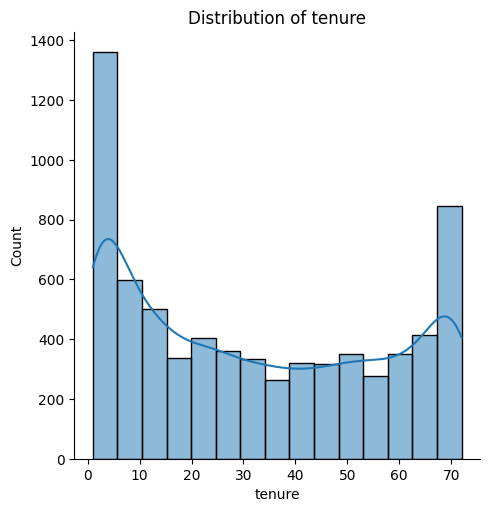

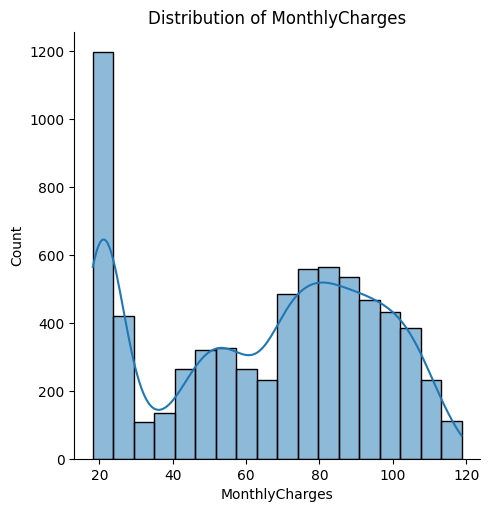

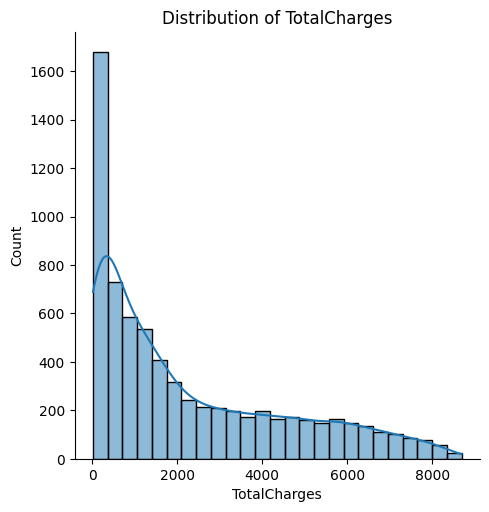

In [21]:
for c in numeric_columns:
    plot_continuous_distribution(df,c,5)

In [22]:
def plot_categorical_distribution(data, column, height):
  _ = sns.catplot(data=data, x=column, kind='count', height=height).set(title=f'Distribution of {column}');


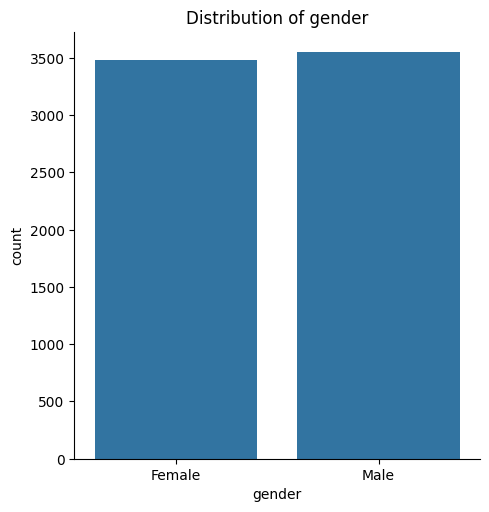

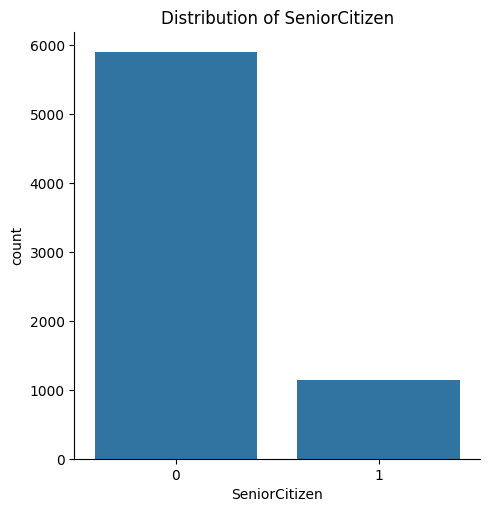

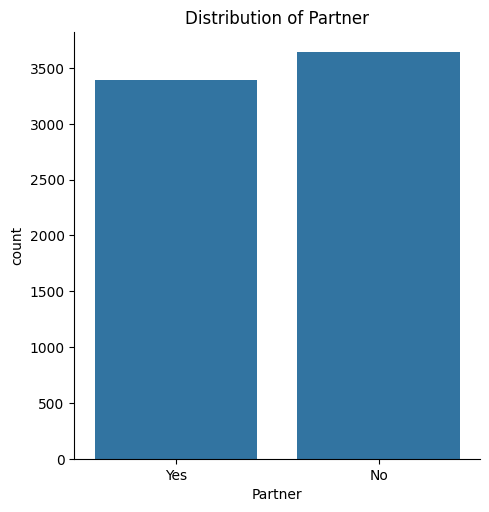

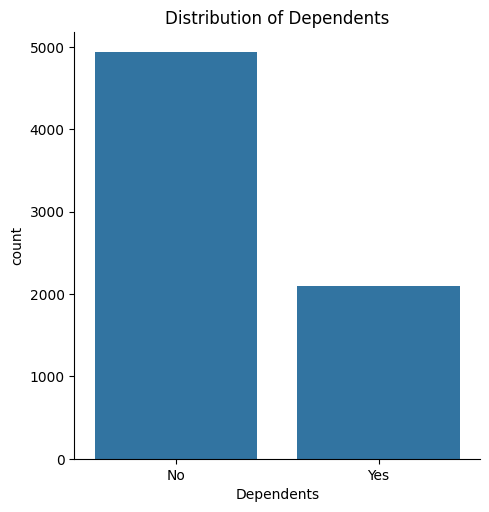

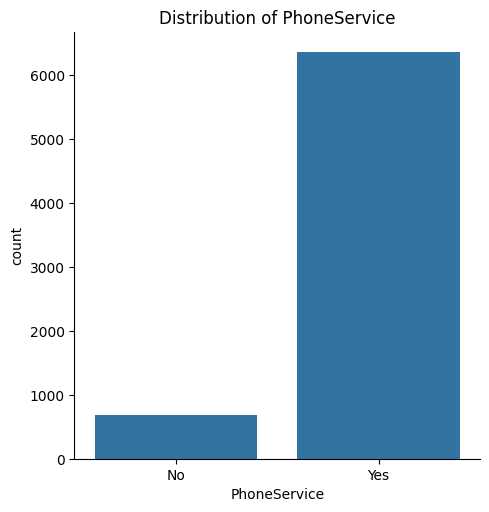

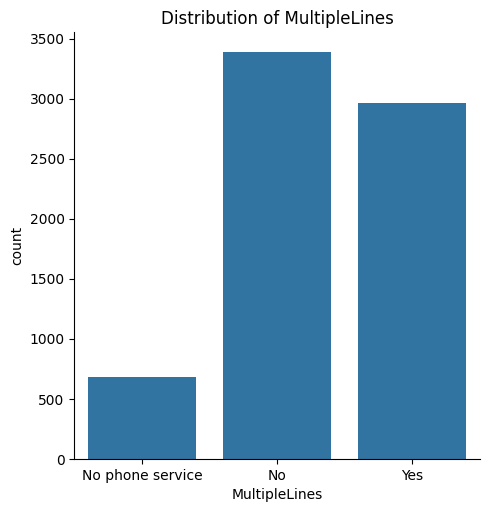

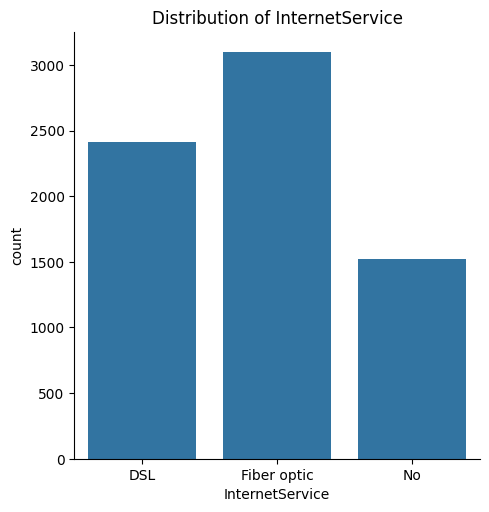

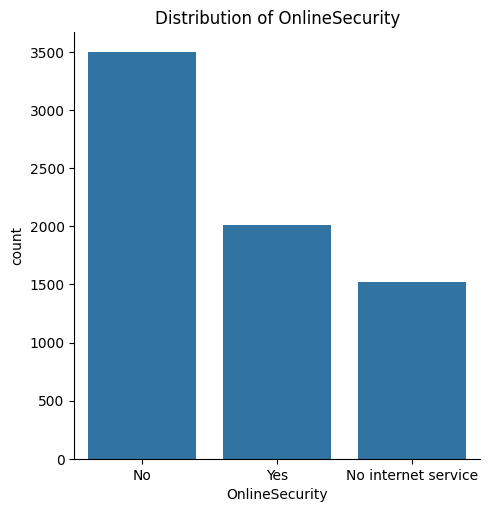

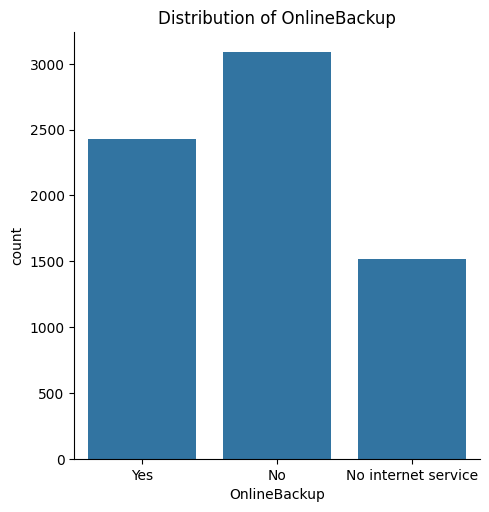

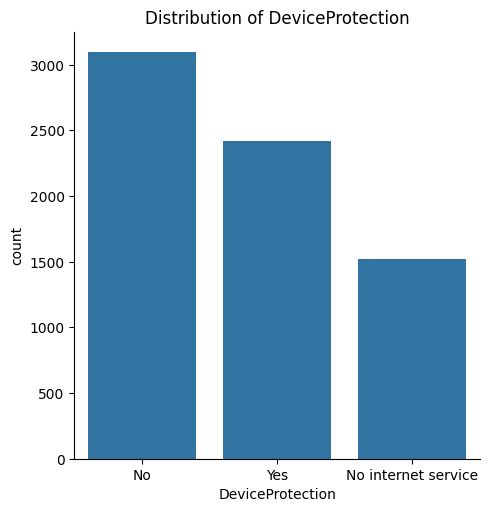

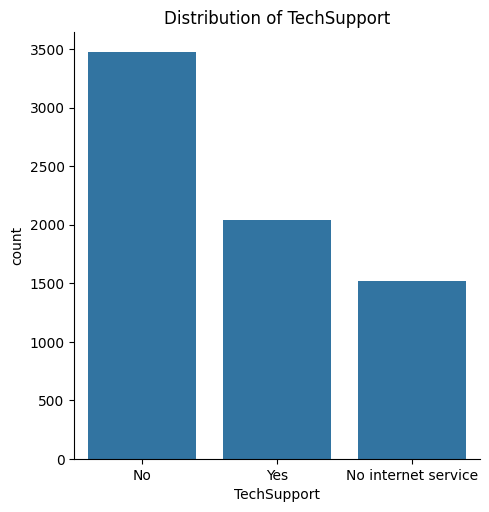

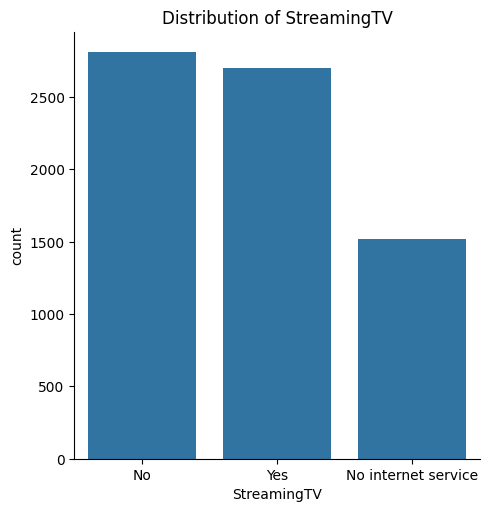

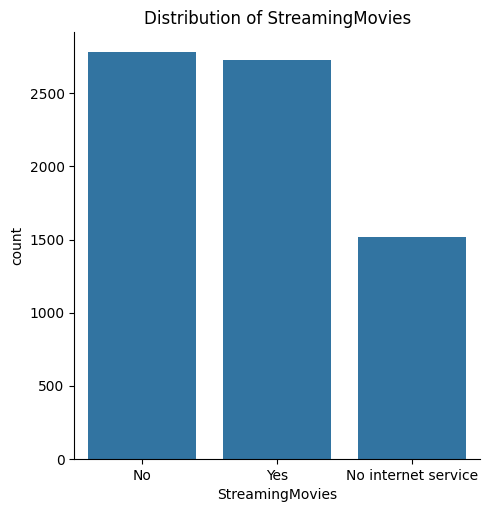

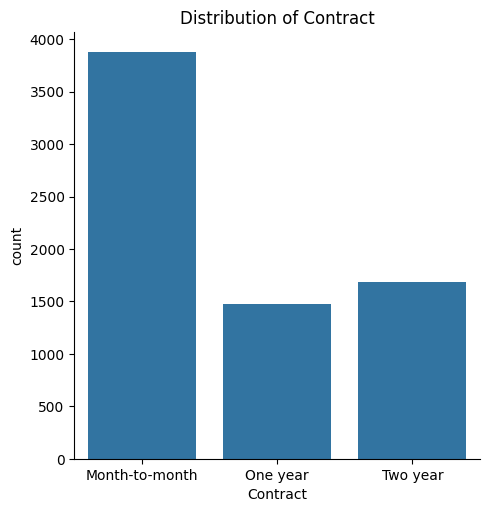

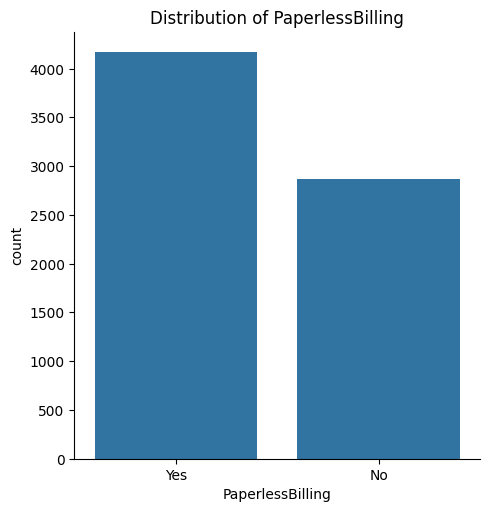

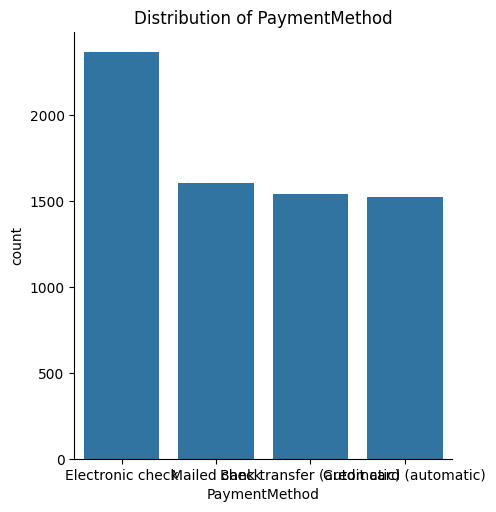

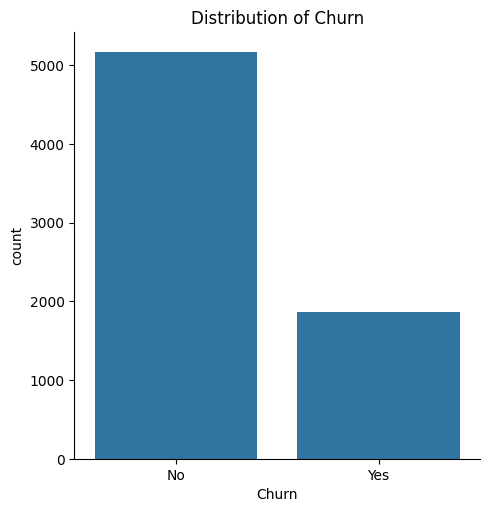

In [23]:
for c in cat_columns:
    plot_categorical_distribution(df,c,height=5)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
listOfCategories=[]
def useLabelEncoder(data,columns):
    label_encoder = LabelEncoder()
    for c in columns:
        data[c] = label_encoder.fit_transform(data[c])
        data[c]=data[c].astype("category")
        data[c]=data[c].cat.as_unordered()
        listOfCategories.append(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))



In [26]:
useLabelEncoder(df,cat_columns)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
df.corr().style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

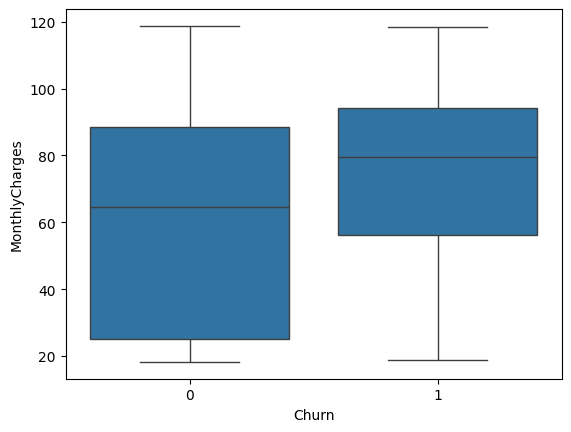

In [30]:
sns.boxplot(x="Churn",y="MonthlyCharges",data=df)

<Axes: xlabel='Churn', ylabel='tenure'>

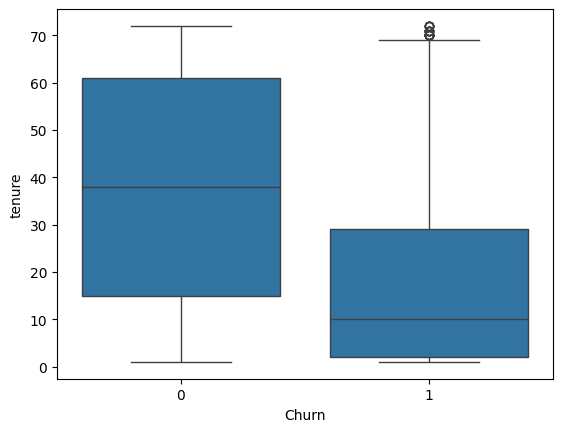

In [31]:
sns.boxplot(x="Churn",y="tenure",data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

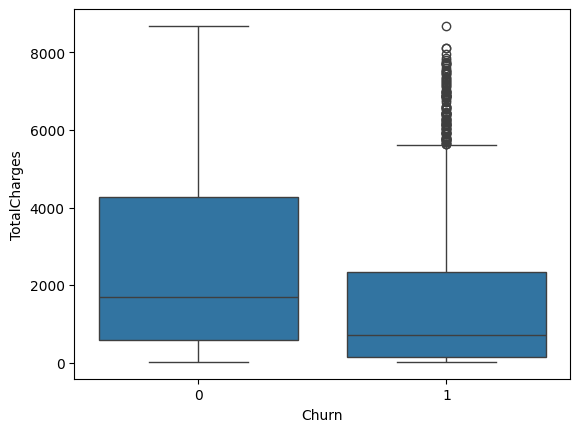

In [32]:
sns.boxplot(x="Churn",y="TotalCharges",data=df)

<Axes: xlabel='TotalCharges'>

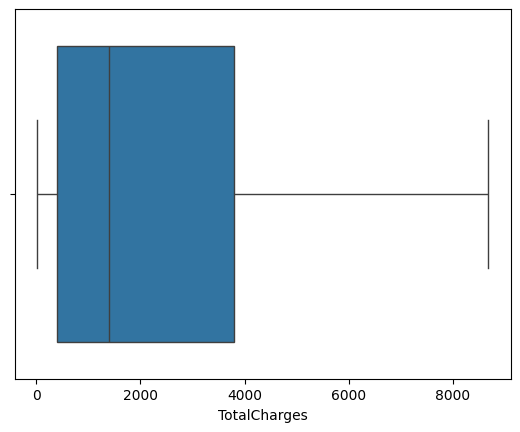

In [33]:
sns.boxplot(x="TotalCharges",data=df)

In [34]:
df.groupby("Churn")["TotalCharges"].mean()

Churn
0    2555.344141
1    1531.796094
Name: TotalCharges, dtype: float64

In [35]:
df.groupby("Churn")["tenure"].mean()

Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

In [36]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

In [37]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [38]:
df.groupby("gender")["MonthlyCharges"].mean()

gender
0    65.216652
1    64.387546
Name: MonthlyCharges, dtype: float64

In [39]:
df.groupby("gender")["tenure"].mean()

gender
0    32.290841
1    32.550296
Name: tenure, dtype: float64

In [40]:
df.groupby("gender")["TotalCharges"].mean()

gender
0    2283.190985
1    2283.407861
Name: TotalCharges, dtype: float64

In [41]:
df.groupby(["gender","Churn"]).size()

gender  Churn
0       0        2544
        1         939
1       0        2619
        1         930
dtype: int64

In [42]:
listOfCategories

[{'Female': 0, 'Male': 1},
 {0: 0, 1: 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'No phone service': 1, 'Yes': 2},
 {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 {'No': 0, 'Yes': 1},
 {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 {'No': 0, 'Yes': 1}]

In [43]:
total_customer=df["Churn"].count()
total_customer

7032

In [44]:
noChurnCount=(df["Churn"] == 0).sum()
noChurnCount

5163

In [45]:
yesChurnCount=(df["Churn"]==1).sum()
yesChurnCount

1869

In [46]:
precentageOfChurned= round((yesChurnCount/total_customer)*100, 2)
precentageOfChurned

26.58

In [47]:
precentageOfNoChurned= round((noChurnCount/total_customer)*100, 2)
precentageOfNoChurned

73.42

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [49]:
result = df.groupby(["PhoneService", "Churn"]).size().unstack()
result

Churn,0,1
PhoneService,,
0,510,170
1,4653,1699


In [50]:
df["PhoneService"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [51]:
def calculate_churn_rate(df, service_column, churn_column, service_values):
    yes_churn = (df[service_column].isin(service_values)) & (df[churn_column] == 1)
    print(yes_churn.sum())
    countServiceUsing = df[service_column].isin(service_values)
    print(countServiceUsing.sum())
    churn_rate = (yes_churn.sum() / countServiceUsing.sum()) * 100
    return churn_rate

# Örnek kullanım:
internet_churn_rate = calculate_churn_rate(df, "InternetService", "Churn", [0, 1])
phone_churn_rate = calculate_churn_rate(df, "PhoneService", "Churn", [1])
multiLines_churn_rate = calculate_churn_rate(df,"MultipleLines","Churn",[2])
OnlineSecurity_churn_rate = calculate_churn_rate(df,"OnlineSecurity","Churn",[2])
OnlineBackup_churn_rate = calculate_churn_rate(df,"OnlineBackup","Churn",[2])
DeviceProtection_churn_rate = calculate_churn_rate(df,"DeviceProtection","Churn",[2])
StreamingTV_churn_rate = calculate_churn_rate(df,"StreamingTV","Churn",[2])
StreamingMovies_churn_rate = calculate_churn_rate(df,"StreamingMovies","Churn",[2])
TechSupport_churn_rate = calculate_churn_rate(df,"TechSupport","Churn",[2])

print(f"İnternet Servis kullanan ve terk eden müşteri oranı: %{internet_churn_rate}")
print(f"Telefon Servis kullanan ve terk eden müşteri oranı: %{phone_churn_rate}")
print(f"Multiple Lines Servis kullanan ve terk eden müşteri oranı: %{multiLines_churn_rate}")
print(f"Online Security Servis kullanan ve terk eden müşteri oranı: %{OnlineSecurity_churn_rate}")
print(f"Online Backup Servis kullanan ve terk eden müşteri oranı: %{OnlineBackup_churn_rate}")
print(f"Device Protection Servis kullanan ve terk eden müşteri oranı: %{DeviceProtection_churn_rate}")
print(f"Streaming TV Servis kullanan ve terk eden müşteri oranı: %{StreamingTV_churn_rate}")
print(f"Streaming Movies Servis kullanan ve terk eden müşteri oranı: %{StreamingMovies_churn_rate}")
print(f"Tech Support Servis kullanan ve terk eden müşteri oranı: %{TechSupport_churn_rate}")



1756
5512
1699
6352
850
2967
295
2015
523
2425
545
2418
814
2703
818
2731
310
2040
İnternet Servis kullanan ve terk eden müşteri oranı: %31.8577648766328
Telefon Servis kullanan ve terk eden müşteri oranı: %26.747481108312343
Multiple Lines Servis kullanan ve terk eden müşteri oranı: %28.648466464442198
Online Security Servis kullanan ve terk eden müşteri oranı: %14.640198511166252
Online Backup Servis kullanan ve terk eden müşteri oranı: %21.567010309278352
Device Protection Servis kullanan ve terk eden müşteri oranı: %22.539288668320925
Streaming TV Servis kullanan ve terk eden müşteri oranı: %30.114687384387718
Streaming Movies Servis kullanan ve terk eden müşteri oranı: %29.952398388868545
Tech Support Servis kullanan ve terk eden müşteri oranı: %15.196078431372548


In [52]:
def usageRateOfServices(df, service_column, service_values):
    yes_usage = df[service_column].isin(service_values).sum()
    total_customer = df[service_column].count()
    usage_rate = round((yes_usage/total_customer)*100,2)
    
    print(f"Müşterilerin % {usage_rate}'i {service_column} kulanıyor.")

internet_churn_rate = usageRateOfServices(df, "InternetService", [0, 1])
phone_churn_rate = usageRateOfServices(df, "PhoneService",[1])
multiLines_churn_rate = usageRateOfServices(df,"MultipleLines", [2])
OnlineSecurity_churn_rate = usageRateOfServices(df,"OnlineSecurity", [2])
OnlineBackup_churn_rate = usageRateOfServices(df,"OnlineBackup", [2])
DeviceProtection_churn_rate = usageRateOfServices(df,"DeviceProtection", [2])
StreamingTV_churn_rate = usageRateOfServices(df,"StreamingTV", [2])
StreamingMovies_churn_rate = usageRateOfServices(df,"StreamingMovies", [2])
TechSupport_churn_rate = usageRateOfServices(df,"TechSupport", [2])


Müşterilerin % 78.38'i InternetService kulanıyor.
Müşterilerin % 90.33'i PhoneService kulanıyor.
Müşterilerin % 42.19'i MultipleLines kulanıyor.
Müşterilerin % 28.65'i OnlineSecurity kulanıyor.
Müşterilerin % 34.49'i OnlineBackup kulanıyor.
Müşterilerin % 34.39'i DeviceProtection kulanıyor.
Müşterilerin % 38.44'i StreamingTV kulanıyor.
Müşterilerin % 38.84'i StreamingMovies kulanıyor.
Müşterilerin % 29.01'i TechSupport kulanıyor.


In [53]:
df.groupby(["SeniorCitizen","Churn"]).size().unstack()

Churn,0,1
SeniorCitizen,,
0,4497,1393
1,666,476


In [54]:
noSeniorCount = df["SeniorCitizen"].isin([0]).sum()
yesSeniorCount = df["SeniorCitizen"].isin([1]).sum()

noSeniorYesChurn = df["SeniorCitizen"].isin([0]) & df["Churn"].isin([1])
yesSeniorYesChurn = df["SeniorCitizen"].isin([1]) & df["Churn"].isin([1])

noSenior_churn_rate = (noSeniorYesChurn.sum() / noSeniorCount) * 100
senior_churn_rate = (yesSeniorYesChurn.sum() / yesSeniorCount) * 100

print(f"Senior olmayan müşterilerin % {noSenior_churn_rate}'si telcom'u terk etmiş.")
print(f"Senior olan müşterilerin % {senior_churn_rate}'si telcom'u terk etmiş.")


Senior olmayan müşterilerin % 23.65025466893039'si telcom'u terk etmiş.
Senior olan müşterilerin % 41.68126094570928'si telcom'u terk etmiş.


In [55]:
df.groupby(["Partner","Churn"]).size().unstack()

Churn,0,1
Partner,,
0,2439,1200
1,2724,669


In [56]:
yesPartnerCount=df["Partner"].isin([1]).sum()
noPartnerCount=df["Partner"].isin([0]).sum()

rateOfYesPartnerChurn = ((df["Partner"].isin([1]) & df["Churn"].isin([1])).sum() / yesPartnerCount)*100
rateOfNoPartnerChurn = ((df["Partner"].isin([0]) & df["Churn"].isin([1])).sum() / noPartnerCount)*100

print(f"Partneri olan müşterilerin % {round(rateOfYesPartnerChurn,2)}'si telcomu terk etmiş.")
print(f"Partneri olmayan müşterilerin % {round(rateOfNoPartnerChurn,2)}'si telcomu terk etmiş.")



Partneri olan müşterilerin % 19.72'si telcomu terk etmiş.
Partneri olmayan müşterilerin % 32.98'si telcomu terk etmiş.


In [57]:
df["Partner"].value_counts()

0    3639
1    3393
Name: Partner, dtype: int64

In [58]:
yesDependentCount=df["Dependents"].isin([1]).sum()
noDependentsCount=df["Dependents"].isin([0]).sum()

rateOfYesDependentChurn = ((df["Dependents"].isin([1]) & df["Churn"].isin([1])).sum() / yesDependentCount)*100
rateOfNoDependentChurn = ((df["Dependents"].isin([0]) & df["Churn"].isin([1])).sum() / noDependentsCount)*100

print(f"Dependentsi olan müşterilerin % {round(rateOfYesDependentChurn,2)}'si telcomu terk etmiş.")
print(f"Dependentsi olmayan müşterilerin % {round(rateOfNoDependentChurn,2)}'si telcomu terk etmiş.")

Dependentsi olan müşterilerin % 15.53'si telcomu terk etmiş.
Dependentsi olmayan müşterilerin % 31.28'si telcomu terk etmiş.


In [59]:
df.groupby(["Dependents","Churn"]).size().unstack()

Churn,0,1
Dependents,,
0,3390,1543
1,1773,326


In [60]:
df.groupby("Churn")["tenure"].mean()

Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

In [61]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [62]:
df.groupby(["Contract","Churn"]).size().unstack()

Churn,0,1
Contract,,
0,2220,1655
1,1306,166
2,1637,48


In [63]:
df.groupby(["PaymentMethod","Churn"]).size().unstack()

Churn,0,1
PaymentMethod,,
0,1284,258
1,1289,232
2,1294,1071
3,1296,308


electronic check ödeme yönteminde olan müşteriler, diğer ödeme yöntemini deneyen müşterilere göre 5 kat daha fazla çıkma oranına sahip.

In [64]:
listOfCategories

[{'Female': 0, 'Male': 1},
 {0: 0, 1: 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'No phone service': 1, 'Yes': 2},
 {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 {'No': 0, 'Yes': 1},
 {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 {'No': 0, 'Yes': 1}]

In [65]:
cat_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [66]:
df.groupby(["PaperlessBilling","Churn"]).size().unstack()

Churn,0,1
PaperlessBilling,,
0,2395,469
1,2768,1400


fiziki olarak bir fatura istemeyen müşteriler, isteyen müşterilere oranla 3 kat daha fazla telcomu terk etme oranına sahip.

In [67]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

In [68]:
df.groupby("Churn")["TotalCharges"].mean()

Churn
0    2555.344141
1    1531.796094
Name: TotalCharges, dtype: float64

terk eden müşterilerin aylık ödemesi fazla iken toplam ödemesi daha az, terk etmeyenlere göre.

Çapraz analizler

Hizmet Türü - Sözleşme Türü - Müşteri Kaybı:

Hangi hizmet türlerini kullanan müşteriler, hangi sözleşme türlerini tercih ediyor ve bu grupların müşteri kaybı oranları nasıl değişiyor?
Örneğin, internet hizmetini kullanan müşterilerin çoğunluğu hangi sözleşme türünü seçiyor ve bu grupların müşteri kaybı oranları diğerlerinden farklı mı?

Demografik Faktör - Hizmet Süresi - Müşteri Kaybı:

Belirli bir demografik faktöre (örneğin, yaş aralığı) sahip müşterilerin, belirli bir hizmeti ne kadar süredir kullandıkları ve bu grupların müşteri kaybı oranları arasındaki ilişki nedir?
Örneğin, genç yaş aralığındaki müşterilerin belirli bir hizmeti uzun süre kullandıkları durumda müşteri kaybı oranları nasıl değişiyor?

Faturalama Türü - Aylık Ücret - Müşteri Kaybı:

Elektronik fatura kullanma tercihi, müşterilerin ödedikleri aylık ücretle nasıl ilişkilidir ve bu faktörler müşteri kaybını nasıl etkiler?
Örneğin, elektronik fatura kullanan müşterilerin ödedikleri aylık ücret arttıkça müşteri kaybı oranları nasıl değişiyor?

In [69]:
df.groupby(["Contract", "InternetService"]).size() / df.groupby("InternetService").size() * 100



Contract  InternetService
0         0                  50.620861
          1                  68.733850
          2                  34.473684
1         0                  23.592715
          1                  17.409561
          2                  23.881579
2         0                  25.786424
          1                  13.856589
          2                  41.644737
dtype: float64

{'Month-to-month': 0, 'One year': 1, 'Two year': 2}

In [70]:
def contractRateBasedOnService(df,service,contract,service_values,contract_values):
    for v in contract_values:
        if v==0:
            Month_to_month_rate = ((df[service].isin(service_values) & df[contract].isin([v])).sum()/ df[service].isin(service_values).sum())*100
            print(f"{service} kullanıcılarının % {Month_to_month_rate}'si aydan aya kontrat imzalamış")
        elif v==1:
            One_year_rate = ((df[service].isin(service_values) & df[contract].isin([v])).sum()/ df[service].isin(service_values).sum())*100
            print(f"{service} kullanıcılarının % {One_year_rate}'si 1 yıl kontrat imzalamış")
        else:
            Two_year_rate = ((df[service].isin(service_values) & df[contract].isin([v])).sum()/ df[service].isin(service_values).sum())*100
            print(f"{service} kullanıcılarının % {Two_year_rate}'si 2 yıl kontrat imzalamış")


contractRateBasedOnService(df,"InternetService","Contract",[0,1],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"PhoneService","Contract",[1],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"MultipleLines","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"OnlineSecurity","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"OnlineBackup","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"DeviceProtection","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"TechSupport","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"StreamingTV","Contract",[2],[0,1,2])
print("-----------------------------------------------------------------")
contractRateBasedOnService(df,"StreamingMovies","Contract",[2],[0,1,2])



InternetService kullanıcılarının % 60.794629898403485'si aydan aya kontrat imzalamış
InternetService kullanıcılarının % 20.11973875181422'si 1 yıl kontrat imzalamış
InternetService kullanıcılarının % 19.085631349782293'si 2 yıl kontrat imzalamış
-----------------------------------------------------------------
PhoneService kullanıcılarının % 55.08501259445844'si aydan aya kontrat imzalamış
PhoneService kullanıcılarının % 20.891057934508815'si 1 yıl kontrat imzalamış
PhoneService kullanıcılarının % 24.023929471032744'si 2 yıl kontrat imzalamış
-----------------------------------------------------------------
MultipleLines kullanıcılarının % 49.94944388270981'si aydan aya kontrat imzalamış
MultipleLines kullanıcılarının % 20.761712167172227'si 1 yıl kontrat imzalamış
MultipleLines kullanıcılarının % 29.288843950117965'si 2 yıl kontrat imzalamış
-----------------------------------------------------------------
OnlineSecurity kullanıcılarının % 35.73200992555831'si aydan aya kontrat imzala

In [71]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [72]:
listOfCategories

[{'Female': 0, 'Male': 1},
 {0: 0, 1: 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'Yes': 1},
 {'No': 0, 'No phone service': 1, 'Yes': 2},
 {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'No': 0, 'No internet service': 1, 'Yes': 2},
 {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 {'No': 0, 'Yes': 1},
 {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 {'No': 0, 'Yes': 1}]

In [73]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

In [74]:
# Gerekli kütüphaneleri yükleyin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirin (Standartlaştırma)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression modelini eğitin
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Random Forest modelini eğitin
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# SVM modelini eğitin
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Tahminler yapın
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Model performansını değerlendirin
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

# Confusion Matrix ve Classification Report'u görüntüleyin
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))

print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, random_forest_predictions))

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))


Logistic Regression Accuracy: 0.7853589196872779
Random Forest Accuracy: 0.7924662402274343
SVM Accuracy: 0.7910447761194029

Logistic Regression Confusion Matrix:
 [[920 113]
 [189 185]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Random Forest Confusion Matrix:
 [[936  97]
 [195 179]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


SVM Confusion Ma

In [75]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer

# Logistic Regression modeli için cross-validation
logistic_cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Logistic Regression Cross-Validation Mean Accuracy:", logistic_cv_scores.mean())

# Random Forest modeli için cross-validation
random_forest_cv_scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", random_forest_cv_scores)
print("Random Forest Cross-Validation Mean Accuracy:", random_forest_cv_scores.mean())

# SVM modeli için cross-validation
svm_cv_scores = cross_val_score(SVC(), X, y, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Cross-Validation Mean Accuracy:", svm_cv_scores.mean())


c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Logistic Regression Cross-Validation Scores: [0.80241649 0.80028429 0.79231863 0.80654339 0.80512091]
Logistic Regression Cross-Validation Mean Accuracy: 0.8013367424207958
Random Forest Cross-Validation Scores: [0.7981521  0.79104478 0.7745377  0.7972973  0.79943101]
Random Forest Cross-Validation Mean Accuracy: 0.7920925751247825
SVM Cross-Validation Scores: [0.73418621 0.73418621 0.73470839 0.73399716 0.73399716]
SVM Cross-Validation Mean Accuracy: 0.7342150252598014


In [76]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression için Grid Search
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X, y)

print("Best Logistic Regression Parameters:", logistic_grid.best_params_)
print("Best Logistic Regression Cross-Validation Accuracy:", logistic_grid.best_score_)

# Random Forest için Grid Search
random_forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
random_forest_grid = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=5, scoring='accuracy')
random_forest_grid.fit(X, y)

print("\nBest Random Forest Parameters:", random_forest_grid.best_params_)
print("Best Random Forest Cross-Validation Accuracy:", random_forest_grid.best_score_)




c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best Logistic Regression Parameters: {'C': 1}
Best Logistic Regression Cross-Validation Accuracy: 0.8013367424207958

Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Random Forest Cross-Validation Accuracy: 0.7999132563154558


In [78]:
df.shape

(7032, 20)